# Data Wrangling

## Data Collection: TalkingData Ad Tracking Fraud (Kaggle)

In [8]:
# import packages
import os
import pandas as pd
from zipfile import ZipFile
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set-up path
path="/Users/carolewaihai/Documents/springboard/Unit 7/capstone2"
os.chdir(path) 

In [3]:
# Download train.csv.zip & test.csv.zip from kaggle: 
# https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/data?select=train.csv

# Store the zip files into data/raw/zip
# Unzip both files to into data/raw
#zipfile = ZipFile('data/raw/train.csv.zip', mode='r')
#zipfile.extractall('data/raw/')

# Faster way to load the data by batch
# Open a connection to the file
with open('data/raw/train.csv', encoding='utf-8-sig') as file:

    # Process only the first 10 rows
    for j in range(0,10):

        # Split the current line into a list: line
        line = file.readline().split(',')
        print(line)

In [4]:
# Open directly into a dataframe
df = pd.read_csv('data/raw/train_sample.csv')
print(df.head())

       ip  app  device  os  channel           click_time attributed_time  \
0   87540   12       1  13      497  2017-11-07 09:30:38             NaN   
1  105560   25       1  17      259  2017-11-07 13:40:27             NaN   
2  101424   12       1  19      212  2017-11-07 18:05:24             NaN   
3   94584   13       1  13      477  2017-11-07 04:58:08             NaN   
4   68413   12       1   1      178  2017-11-09 09:00:09             NaN   

   is_attributed  
0              0  
1              0  
2              0  
3              0  
4              0  


In [5]:
# Check general information about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


The data is tidy (1 column = 1 variable, 1 row = 1 observation).
The column 'attributed_time' is the only column with empty values.
The only thing to fix is to change the type ;object' from columns 'click_time' and 'attributed_time' into datetime type.

In [16]:
# Changing data type of click_time and attributed_time
df.click_time = pd.to_datetime(df.click_time)
df.attributed_time = pd.to_datetime(df.attributed_time)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ip               100000 non-null  int64         
 1   app              100000 non-null  int64         
 2   device           100000 non-null  int64         
 3   os               100000 non-null  int64         
 4   channel          100000 non-null  int64         
 5   click_time       100000 non-null  datetime64[ns]
 6   attributed_time  227 non-null     datetime64[ns]
 7   is_attributed    100000 non-null  int64         
dtypes: datetime64[ns](2), int64(6)
memory usage: 6.1 MB


In [18]:
# Explore df
df.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


## Data Organization

In [20]:
mkdir data/interim

In [21]:
df.to_csv('data/interim/talkingdata_clicks.csv', index=False)

## Data Definition 

In [22]:
#review the columns
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')

In [23]:
# Open the columns description text file.
f = open("columns_definition.txt", "r") 
print(f.read())

Columns definitions

ip: ip address of click.
app: app id for marketing.
device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
os: os version id of user mobile phone
channel: channel id of mobile ad publisher
click_time: timestamp of click (UTC)
attributed_time: if user download the app for after clicking an ad, this is the time of the app download
is_attributed: the target that is to be predicted, indicating the app was downloaded

Note that ip, app, device, os, and channel are encoded.



In [24]:
# Check the cardinality of each variable (how many uniques values)
df.apply(pd.Series.nunique)

ip                 34857
app                  161
device               100
os                   130
channel              161
click_time         80350
attributed_time      227
is_attributed          2
dtype: int64

click_time has the highest cardinality, it makes sense has it is time related (clicks rarely happened at the same time).
ip address is the other only variable with high cardinality.

app and channel have the same number of unique value, we need to check if it is a coincidence or 1 app = 1 channel.

ip + device + os can be the closest feature we have to describe 1 user.

In [29]:
# Investigating ip in details
(df.ip.value_counts()/len(df.ip)).head(10)

5348      0.00669
5314      0.00616
73487     0.00439
73516     0.00399
53454     0.00280
114276    0.00219
26995     0.00218
95766     0.00205
17149     0.00186
100275    0.00173
Name: ip, dtype: float64

In [31]:
# Exploration of min max values
df.agg([min,max]).T

,min,max
ip,9,364757
app,1,551
device,0,3867
os,0,866
channel,3,498
click_time,2017-11-06 16:00:00,2017-11-09 15:59:51
attributed_time,2017-11-06 17:19:04,2017-11-09 15:28:15
is_attributed,0,1


No ip accounts for more than .7% of all the clicks.

## Data Cleaning 

### Null values 

Only attributed_time has null value when the click has not been attributed to any installs. We decide to leave the null value as is.

### Duplicated values 

In [46]:
# Search for duplicated rows
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
84125,871,12,1,13,178,2017-11-08 10:00:05,NaT,0


In [47]:
df = df.drop_duplicates()

In [48]:
df.shape

(99999, 8)

In [49]:
df.to_csv('data/interim/talkingdata_clicks.csv', index=False)

# Exploratory Data Analysis (EDA) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4ef00610>,
      dtype=object)

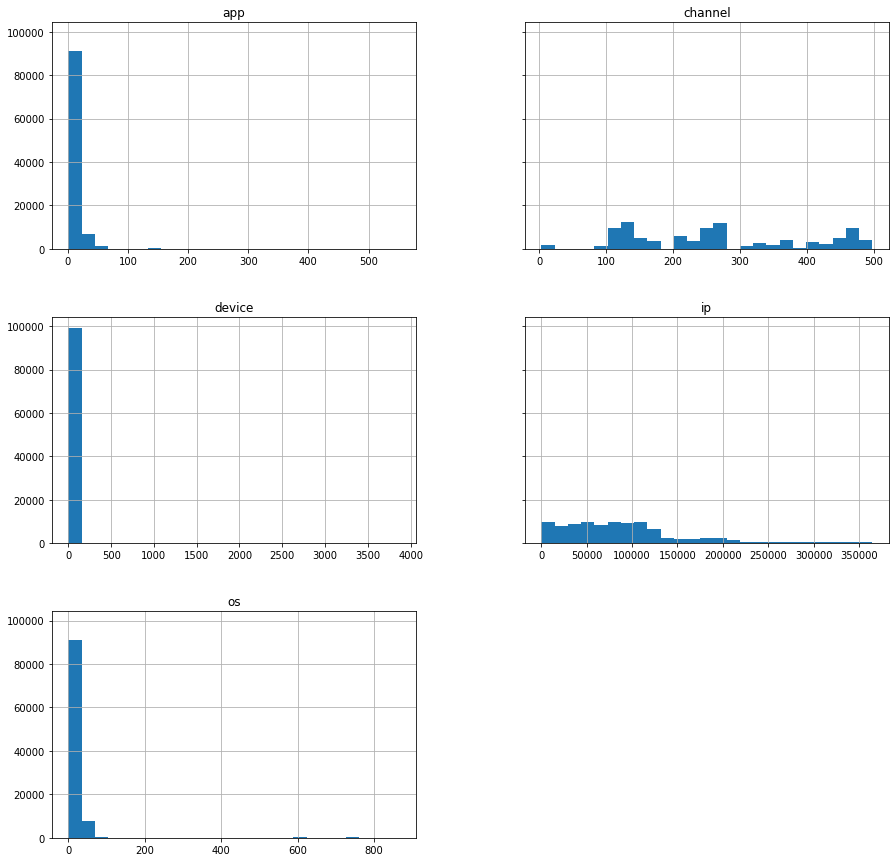

In [50]:
# Use histogram to build data profiles
df[['ip','app','device','os','channel']].hist(bins=25, figsize=(15, 15), layout=(3, 2), sharey=True)

We observe from the data that app and channel are not distributed similarly, so the 161 uniques values are a coincidence.

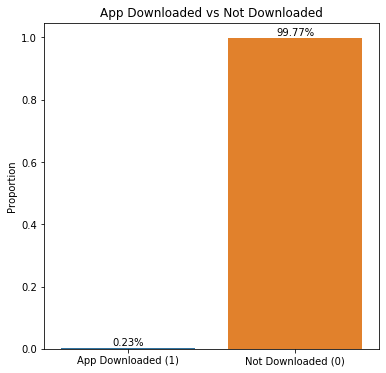

In [51]:
#Let's explore the is_attributed column
plt.figure(figsize=(6,6))
mean = (df.is_attributed.values == 1).mean() #get the pourcentage of clicks attributed

ax = sns.barplot(['App Downloaded (1)', 'Not Downloaded (0)'], [mean, 1-mean])
ax.set(ylabel='Proportion', title='App Downloaded vs Not Downloaded')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center")

The dataset show an important inbalance in the number of click attributed vs non-attributed.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


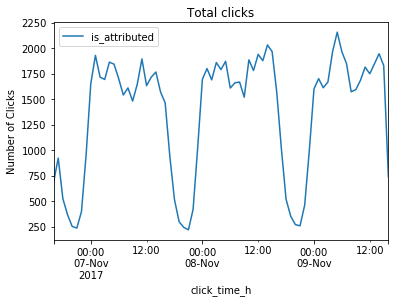

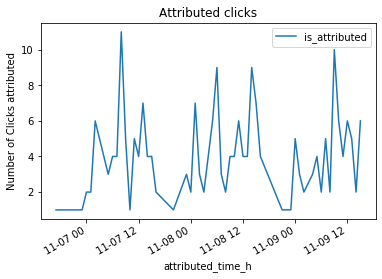

In [60]:
#round the time to nearest hour
df['click_time_h']=df['click_time'].dt.round('H')  
df['attributed_time_h']=df['attributed_time'].dt.round('H')  


#check for hourly patterns
df[['click_time_h','is_attributed']].groupby(['click_time_h'], as_index=True).count().plot()
plt.title('Total clicks');
plt.ylabel('Number of Clicks');

#check for hourly patterns
df[['attributed_time_h','is_attributed']].groupby(['attributed_time_h'], as_index=True).count().plot()
plt.title('Attributed clicks');
plt.ylabel('Number of Clicks attributed');

We can see a clear hourly click patterns following people life habits (less click during night time).
However there are not enough attributed clicks to see similar hourly patterns. Attributed clicks seems more randoms.

In [ ]:
## What's next

## Search for outlier
# As the feature are encoded categorical variable we can not use the traditional boxplot to check for outliers.
# Instead it might be worth counting the number of click per ip, device and os and see if 
##any particular ip, device or os has a significantly high number of clicks compare to the average and median.
##any particular ip, device or os has a significantly high number of attributed clicks compare to the average and median.

In [ ]:
#extract hour as a feature
df['click_hour']=df['click_time'].dt.hour